#

# Questão 1
![alt text](Questão1_a.png)

![alt text](Questão1_b.png)

![alt text](Questão1_c.png)

# Item a)

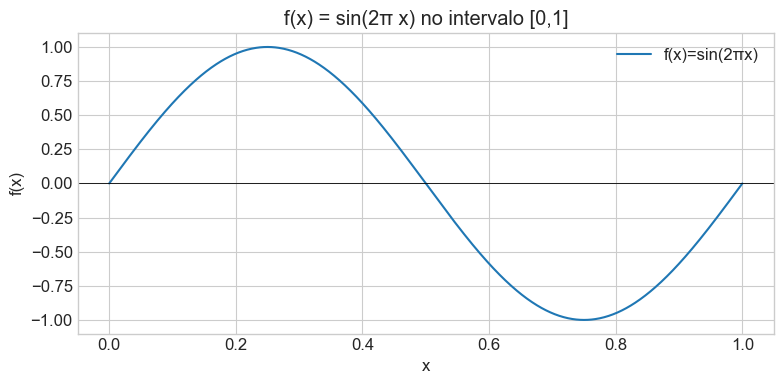

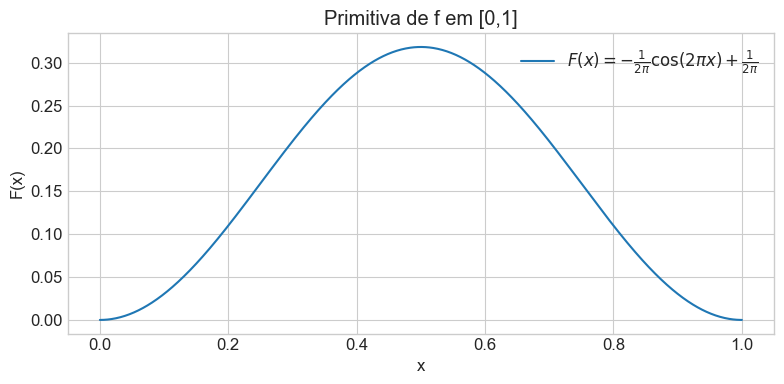

Integral analítica ∫_0^1 sin(2π x) dx = 0.0


In [16]:
# item_a_visualizacao_analitica.py
import numpy as np
import matplotlib.pyplot as plt

omega = 2.0 * np.pi
a, b = 0.0, 1.0

def f(x):
    return np.sin(omega * x)

def primitive_shifted(x):
    # Pelas condições de contorno F(0)=0: F(x) = -cos(ωx)/ω + 1/ω
    return -np.cos(omega * x) / omega + 1.0 / omega

# malha para plot
x = np.linspace(a, b, 1000)
y = f(x)
F = primitive_shifted(x)

# plots
plt.figure(figsize=(8,4))
plt.plot(x, y, label='f(x)=sin(2πx)')
plt.axhline(0, color='k', linewidth=0.6)
plt.title("f(x) = sin(2π x) no intervalo [0,1]")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.plot(x, F, label='$F(x) = -\\frac{1}{2\pi}\cos(2\pi x) + \\frac{1}{2\pi}$')
plt.title("Primitiva de f em [0,1]")
plt.xlabel("x"); plt.ylabel("F(x)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# valor analítico da integral
I_analytical = (-np.cos(omega * b) + np.cos(omega * a)) / omega

print("Integral analítica ∫_0^1 sin(2π x) dx =", I_analytical)


# Item b)

In [ ]:
# item_b_trapezio_n10.py
import numpy as np

omega = 2.0 * np.pi
a, b = 0.0, 1.0
def f(x): return np.sin(omega * x)

def composite_trapezoid(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    return h * (0.5*y[0] + 0.5*y[-1] + y[1:-1].sum())

# valor analítico
I_analytical = 0.0  # sabemos que é zero para sin(2πx) em [0,1]

n = 10
I_trap = composite_trapezoid(f, a, b, n)
erro = abs(I_trap - I_analytical)

print(f"Trapézio composto (n={n}): estimativa = {I_trap:.16g}, erro absoluto = {erro:.6e}")


Trapézio composto (n=10): estimativa = -1.010643099614861e-16, erro absoluto = 1.010643e-16


# Item c)

In [7]:
# item_c_simpson_n10.py
import numpy as np

omega = 2.0 * np.pi
a, b = 0.0, 1.0
def f(x): return np.sin(omega * x)

def composite_simpson(func, a, b, n):
    if n % 2 == 1:
        raise ValueError("n deve ser par para Simpson composto.")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    S_odd = y[1:-1:2].sum()
    S_even = y[2:-1:2].sum()
    return (h/3.0) * (y[0] + y[-1] + 4.0*S_odd + 2.0*S_even)

I_analytical = 0.0

n = 10
I_simp = composite_simpson(f, a, b, n)
erro = abs(I_simp - I_analytical)

print(f"Simpson composto (n={n}): estimativa = {I_simp:.16g}, erro absoluto = {erro:.6e}")


Simpson composto (n=10): estimativa = -3.77702593176532e-17, erro absoluto = 3.777026e-17


# Item d)

n=  10 | Trapézio=-1.010643099614861e-16, err=1.010643e-16 | Simpson=-3.77702593176532e-17, err=3.777026e-17
n= 100 | Trapézio=-1.496365672888367e-17, err=1.496366e-17 | Simpson=4.788289959644484e-19, err=4.788290e-19
n=1000 | Trapézio=-5.696588354072275e-17, err=5.696588e-17 | Simpson=-8.164311994315687e-20, err=8.164312e-20


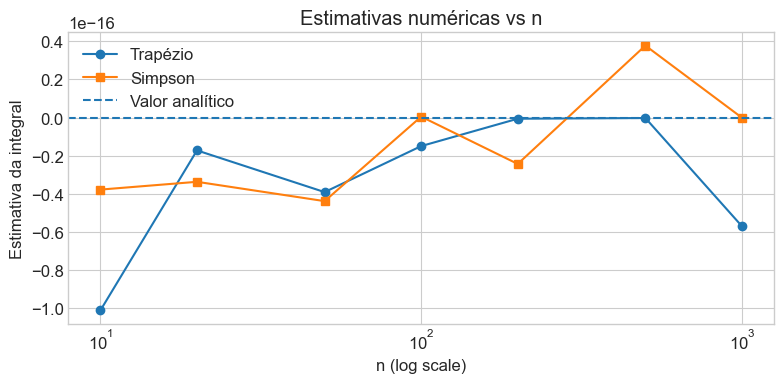

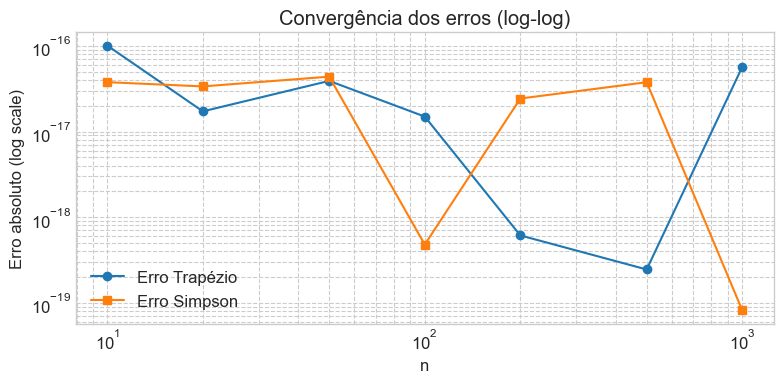

In [ ]:
# item_d_aumento_resolucao.py
import numpy as np
import matplotlib.pyplot as plt

omega = 2.0*np.pi
a, b = 0.0, 1.0
def f(x): return np.sin(omega * x)

def composite_trapezoid(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    return h * (0.5*y[0] + 0.5*y[-1] + y[1:-1].sum())

def composite_simpson(func, a, b, n):
    if n % 2 == 1:
        n += 1  # garantir par
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    S_odd = y[1:-1:2].sum()
    S_even = y[2:-1:2].sum()
    return (h/3.0) * (y[0] + y[-1] + 4.0*S_odd + 2.0*S_even)

I_analytical = 0.0
ns = [10, 20, 50, 100, 200, 500, 1000]
results = []
for n in ns:
    I_trap = composite_trapezoid(f, a, b, n)
    I_simp = composite_simpson(f, a, b, n)  # ajusta par internamente
    results.append((n, I_trap, abs(I_trap - I_analytical), I_simp, abs(I_simp - I_analytical)))

# imprimir subset solicitado
for n, itrap, etrap, isimp, esimp in results:
    if n in (10, 100, 1000):
        print(f"n={n:4d} | Trapézio={itrap:.16g}, err={etrap:.6e} | Simpson={isimp:.16g}, err={esimp:.6e}")

# plot das estimativas vs n
plt.figure(figsize=(8,4))
plt.plot([r[0] for r in results], [r[1] for r in results], marker='o', label='Trapézio')
plt.plot([r[0] for r in results], [r[3] for r in results], marker='s', label='Simpson')
plt.axhline(I_analytical, linestyle='--', label='Valor analítico')
plt.xscale('log')
plt.xlabel('n (log scale)'); plt.ylabel('Estimativa da integral')
plt.title('Estimativas numéricas vs n')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# plot dos erros (log-log)
plt.figure(figsize=(8,4))
plt.loglog([r[0] for r in results], [r[2] for r in results], marker='o', label='Erro Trapézio')
plt.loglog([r[0] for r in results], [r[4] for r in results], marker='s', label='Erro Simpson')
plt.xlabel('n'); plt.ylabel('Erro absoluto (log scale)')
plt.title('Convergência dos erros (log-log)')
plt.legend(); plt.grid(True, which='both', ls='--'); plt.tight_layout(); plt.show()


# Item e)

In [24]:
# item_e_adaptive_simpson.py
import numpy as np

omega = 2.0 * np.pi
a, b = 0.0, 1.0
def f(x):
    return np.sin(omega * x)

def adaptive_simpson_515_539(func, a, b, eps=1e-6, max_iter=30):
    history = []
    N = 2  # número inicial de subintervalos (deve ser par)
    h = (b - a) / N

    # Inicializa S_0 e T_0 conforme definição
    x_even = np.linspace(a + 2*h, b - h, N//2 - 1) if N > 2 else np.array([])  # pontos pares internos excluindo extremos
    S_prev = (1/3) * (func(a) + func(b) + 2 * np.sum(func(x_even))) if x_even.size > 0 else (1/3) * (func(a) + func(b))

    x_odd = np.linspace(a + h, b - h, N//2)  # pontos ímpares
    T_prev = (2/3) * np.sum(func(x_odd))

    I_prev = h * (S_prev + 2 * T_prev)
    history.append((N, I_prev))

    for i in range(1, max_iter+1):
        N *= 2
        h /= 2

        # Novos pontos pares (k pares em [2,...,N-2])
        new_even_points = np.linspace(a + 2*h, b - 2*h, N//2 - 1)  # todos os pares exceto os extremos
        # Em vez de somar tudo, usamos que S_i = S_{i-1} + T_{i-1} (Eq. 5.38)
        S_new = S_prev + T_prev

        # Novos pontos ímpares (k ímpares em [1,...,N-1])
        new_odd_points = np.linspace(a + h, b - h, N//2)
        T_new = (2/3) * np.sum(func(new_odd_points))

        I_new = h * (S_new + 2 * T_new)
        history.append((N, I_new))

        # Estima erro (Eq. 5.35)
        error_estimate = abs(I_new - I_prev) / 15

        if error_estimate < eps:
            return I_new, N, i, history

        # Atualiza para próxima iteração
        S_prev, T_prev, I_prev = S_new, T_new, I_new

    # Se não convergir dentro do limite, retorna último resultado
    return I_new, N, max_iter, history


eps = 1e-6
I_analytical = 0.0  # integral exata de sin(2pi x) em [0,1]

I_adapt, n_used, iters, history = adaptive_simpson_515_539(f, a, b, eps)

print(f"Adaptive Simpson (eq 5.35-5.39), eps={eps}: estimativa = {I_adapt:.16g}, erro = {abs(I_adapt - I_analytical):.6e}")
print(f"Subintervalos usados = {n_used}, iterações = {iters}")
print("Histórico (primeiras estimativas):")
for n_val, i_val in history[:8]:
    print(f"  n={n_val:6d} -> I(n)={i_val:.16g}")


Adaptive Simpson (eq 5.35-5.39), eps=1e-06: estimativa = 0, erro = 0.000000e+00
Subintervalos usados = 4, iterações = 1
Histórico (primeiras estimativas):
  n=     2 -> I(n)=4.082155997157844e-17
  n=     4 -> I(n)=0


# Questão 2
![alt text](Questão2.png)

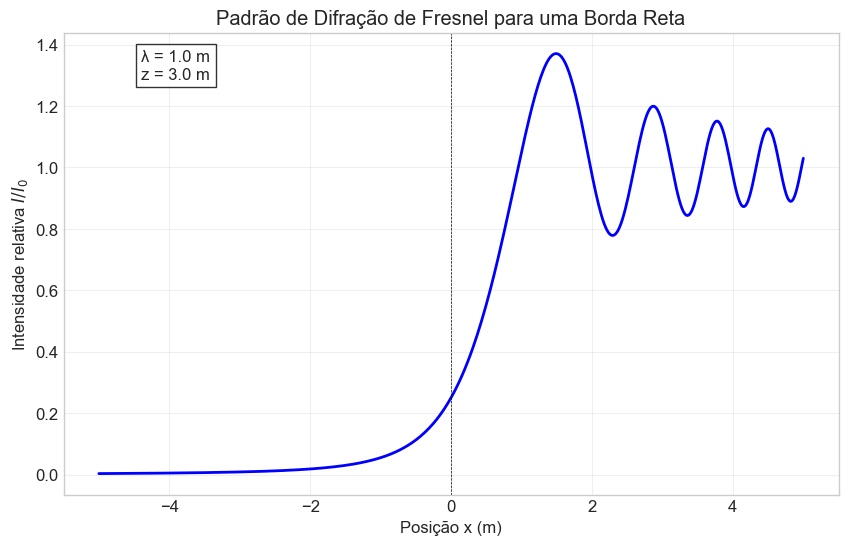

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad
from scipy.special import fresnel

# Parâmetros físicos do problema
lambda_ = 1.0  # Comprimento de onda (m)
z = 3.0        # Distância após a borda (m)

# Funções de Fresnel usando quadratura gaussiana
def C(u, N=50):
    """Integral de Fresnel cosseno usando quadratura gaussiana"""
    integrand = lambda t: np.cos(0.5 * np.pi * t**2)
    result, _ = fixed_quad(integrand, 0, u, n=N)
    return result

def S(u, N=50):
    """Integral de Fresnel seno usando quadratura gaussiana"""
    integrand = lambda t: np.sin(0.5 * np.pi * t**2)
    result, _ = fixed_quad(integrand, 0, u, n=N)
    return result

# Cálculo da intensidade relativa I/I0
def intensity_ratio(x, lambda_, z):
    """Calcula a intensidade difratada relativa I/I0"""
    u = x * np.sqrt(2 / (lambda_ * z))
    C_u = C(u)
    S_u = S(u)
    return ((2*C_u + 1)**2 + (2*S_u + 1)**2) / 8

# Valores de x para o gráfico
x_values = np.linspace(-5, 5, 500)  # De -5m a 5m

# Calculando I/I0 para cada x
I_I0_values = [intensity_ratio(x, lambda_, z) for x in x_values]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_values, I_I0_values, 'b-', linewidth=2)
plt.title('Padrão de Difração de Fresnel para uma Borda Reta')
plt.xlabel('Posição x (m)')
plt.ylabel('Intensidade relativa $I/I_0$')
plt.grid(True, alpha=0.3)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)  # Linha da borda
plt.text(0.1, 0.9, f'λ = {lambda_} m\nz = {z} m', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()


# Questão 3

![alt text](Questão3_a.png)

![alt text](Questão3_b.png)